In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import pickle
from IPython.display import display

# Read data

In [2]:
af = 'vv'

In [3]:
""" Load original data """
df__test = pd.read_csv(f'data/t.{af}1.csv', index_col=[0])
df__test.head()

MemoryError: Unable to allocate 297. MiB for an array with shape (51, 764542) and data type float64

In [ ]:
""" Load preprocessed data used for feeding the model """
pf = '__1__'
expname = 'exp05_mi1'
ra = '78.40'
model_name = 'lof'

# X_train = np.load(f'result/{af}5.{pf}.{model_name}.{expname}.__{ra}__.data.tr.X.npy')
# y_train = np.load(f'data/{af}3.tr.y.npy')

X_test = np.load(f'result/{af}5.{pf}.{model_name}.{expname}.__{ra}__.data.t.X.npy')
y_test = np.load(f'data/{af}3.t.y.npy')

#? lof takes too long to run predict or score_samples, so I saved the score to this file in vv5.lof
y_score = np.load(f'result/{af}5.{pf}.{model_name}.{expname}.__{ra}__.result.t.scores.npy')
y_pred = np.load(f'result/{af}5.{pf}.{model_name}.{expname}.__{ra}__.result.t.y_pred.npy')

# X_val = np.load(f'result/{af}3-5.{pf}.{model_name}.{expname}.__{ra}__.data.v.X.npy')
# y_val = np.load(f'data/{af}3-3.v.y.npy')

In [ ]:
""" Load model """
#? lof takes too long to run predict or score_samples, so I saved the score to this file in vv5.lof, no need to load model anymore
# model = pickle.load(open(f'result/{af}5.{pf}.{model_name}.{expname}.__{ra}__.model.pkl', 'rb'))
# #? model config
# model_config = open(f'result/{af}5.{pf}.{model_name}.{expname}.__{ra}__.config.txt').read()

In [ ]:
""" Load features names """
fts_names = [line.strip() for line in open(f'result/{af}5.{pf}.{model_name}.{expname}.__{ra}__.fts.txt').readlines()]

In [ ]:
# print(X_train.shape)
# print(X_test.shape)
# print(X_val.shape)
# X_test

# Evaluate model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay, roc_auc_score

def evaluate(y_true, y_pred, plot_roc=False):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print(classification_report(y_true, y_pred, digits=4))
    roc_auc = roc_auc_score(y_true, y_pred)
    print(roc_auc)

    if plot_roc:
        display = PrecisionRecallDisplay.from_predictions(y_true, y_pred, name=model_name)
        _ = display.ax_.set_title('2-class Precision-Recall curve')

In [ ]:
evaluate(y_test, y_pred)

[[747340  14240]
 [  1224   1738]]
              precision    recall  f1-score   support

           0     0.9984    0.9813    0.9898    761580
           1     0.1088    0.5868    0.1835      2962

    accuracy                         0.9798    764542
   macro avg     0.5536    0.7840    0.5866    764542
weighted avg     0.9949    0.9798    0.9866    764542

0.7840338644212053


In [ ]:
df_pred = pd.DataFrame(y_pred, columns=['Label_lof'])
dfn = pd.concat([df__test.reset_index(), df_pred], axis=1).drop(columns=['index'])
dfn.head()

,StreamID,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,...,Proto_other,Service,Service_80,Service_443,Service_21,Service_22,Service_25,Service_6667,Service_other,Label_lof
0,1,2021-08-12 20:56:02.042618,0.248864,udp,150.35.87.62,59827,<->,150.35.83.12,53,CON,...,0.0,other,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,2,2021-08-12 20:56:02.051273,0.000458,udp,216.149.170.165,15135,<->,150.35.87.232,13365,CON,...,0.0,other,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,3,2021-08-12 20:56:02.056605,0.140449,tcp,81.114.119.142,3577,->,150.35.87.133,80,alltcp,...,0.0,80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,2021-08-12 20:56:02.108284,0.000666,udp,150.35.87.141,55454,<->,150.35.83.12,53,CON,...,0.0,other,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,5,2021-08-12 20:56:02.108367,0.000749,udp,150.35.87.141,51411,<->,150.35.83.12,53,CON,...,0.0,other,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


## Checking score

In [ ]:
df_score = pd.DataFrame(y_score, columns=[f'Score_{model_name}'])
dfn = pd.concat([dfn, df_score], axis=1)

dfn.head()

,StreamID,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,...,Service,Service_80,Service_443,Service_21,Service_22,Service_25,Service_6667,Service_other,Label_lof,Score_lof
0,1,2021-08-12 20:56:02.042618,0.248864,udp,150.35.87.62,59827,<->,150.35.83.12,53,CON,...,other,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-1.040977
1,2,2021-08-12 20:56:02.051273,0.000458,udp,216.149.170.165,15135,<->,150.35.87.232,13365,CON,...,other,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-1.064285
2,3,2021-08-12 20:56:02.056605,0.140449,tcp,81.114.119.142,3577,->,150.35.87.133,80,alltcp,...,80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.010142
3,4,2021-08-12 20:56:02.108284,0.000666,udp,150.35.87.141,55454,<->,150.35.83.12,53,CON,...,other,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-1.232199
4,5,2021-08-12 20:56:02.108367,0.000749,udp,150.35.87.141,51411,<->,150.35.83.12,53,CON,...,other,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-1.280376


In [ ]:
dfn[dfn[f'Label_{model_name}'] == 1][['StreamID','StartTime','Label',f'Label_{model_name}']].to_csv(f'result/{af}6.{pf}.{model_name}.{expname}.__{ra}__.detected.csv')

### Describe

In [ ]:
print(dfn.loc[(dfn[f'Label_{model_name}'] == 1)][f'Score_{model_name}'].value_counts(), '\n')
print(dfn.loc[(dfn[f'Label_{model_name}'] == 1)][f'Score_{model_name}'].describe(), '\n')

-7.763454e+01    186
-1.525864e+05    148
-2.802229e+06     65
-4.140722e+05     61
-6.372932e+00     46
                ... 
-6.542705e+00      1
-7.345906e+06      1
-4.572860e+00      1
-2.692363e+00      1
-5.378340e+00      1
Name: Score_lof, Length: 13677, dtype: int64 

count    1.597800e+04
mean    -8.256428e+06
std      8.378587e+07
min     -4.312605e+09
25%     -1.423530e+01
50%     -5.071028e+00
75%     -3.486003e+00
max     -2.646037e+00
Name: Score_lof, dtype: float64 



In [ ]:
#? true normal scores
print(dfn.loc[(dfn['Label'] != 5) & (dfn[f'Label_{model_name}'] == 0)][f'Score_{model_name}'].value_counts(), '\n')
print(dfn.loc[(dfn['Label'] != 5) & (dfn[f'Label_{model_name}'] == 0)][f'Score_{model_name}'].describe(), '\n')

-1.000000    11708
-1.724696      327
-1.940665      318
-2.059889       74
-0.926494       39
             ...  
-0.992878        1
-1.610417        1
-0.980114        1
-0.987052        1
-1.131971        1
Name: Score_lof, Length: 727248, dtype: int64 

count    747340.000000
mean         -1.113110
std           0.206653
min          -2.645851
25%          -1.134327
50%          -1.036004
75%          -1.002608
max          -0.094757
Name: Score_lof, dtype: float64 



In [ ]:
# #? false alarm scores
# print(dfn.loc[(dfn['Label'] != 5) & (dfn[f'Label_{model_name}'] == 1)][f'Score_{model_name}'].value_counts(), '\n')
# print(dfn.loc[(dfn['Label'] != 5) & (dfn[f'Label_{model_name}'] == 1)][f'Score_{model_name}'].describe(), '\n')

In [ ]:
#? true detected scores
print(dfn.loc[(dfn['Label'] == 5) & (dfn[f'Label_{model_name}'] == 1)][f'Score_{model_name}'].value_counts(), '\n')
print(dfn.loc[(dfn['Label'] == 5) & (dfn[f'Label_{model_name}'] == 1)][f'Score_{model_name}'].describe(), '\n')

-2.889343e+03    8
-2.897020e+03    4
-1.075152e+05    3
-8.170037e+06    3
-6.795430e+00    3
                ..
-1.272918e+01    1
-1.839161e+01    1
-1.311334e+01    1
-1.022639e+01    1
-6.196954e+01    1
Name: Score_lof, Length: 1683, dtype: int64 

count    1.738000e+03
mean    -4.737092e+05
std      2.696559e+06
min     -4.654950e+07
25%     -2.870912e+01
50%     -1.518613e+01
75%     -5.429338e+00
max     -2.646778e+00
Name: Score_lof, dtype: float64 



In [ ]:
# dfn.loc[(dfn['Label'] == 5) & (dfn[f'Label_{model_name}'] == 1)]

## Apply thresh

In [ ]:
def evaluate_thresh(score, p=2, plot_roc=False):
    print('\n------------')
    print('p =', p)

    #? check the score for p% of outliers
    score_threshold = np.percentile(score, p)
    
    print('score_threshold', score_threshold)

    #? check the model performance at p% threshold
    y_pred_1 = [1 if i < score_threshold else 0 for i in score]

    #? check the prediction performance
    evaluate(y_test, y_pred_1, plot_roc)

    return y_pred_1

### No thresh

[[747340  14240]
 [  1224   1738]]
              precision    recall  f1-score   support

           0     0.9984    0.9813    0.9898    761580
           1     0.1088    0.5868    0.1835      2962

    accuracy                         0.9798    764542
   macro avg     0.5536    0.7840    0.5866    764542
weighted avg     0.9949    0.9798    0.9866    764542

0.7840338644212053


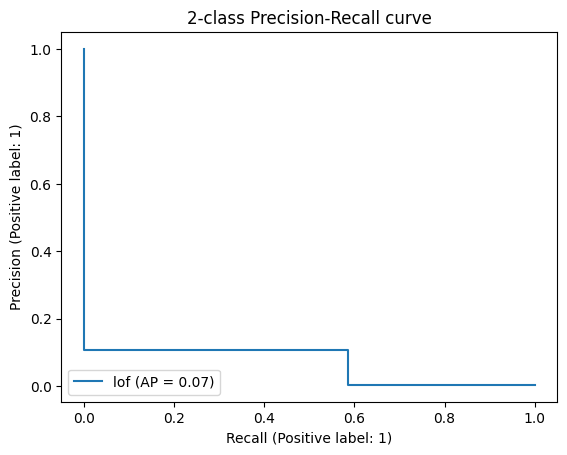

In [ ]:
evaluate(y_test, y_pred, plot_roc=True)

### p = 2%


------------
p = 2
score_threshold -2.7369529078354105
[[748019  13561]
 [  1232   1730]]
              precision    recall  f1-score   support

           0     0.9984    0.9822    0.9902    761580
           1     0.1131    0.5841    0.1896      2962

    accuracy                         0.9807    764542
   macro avg     0.5557    0.7831    0.5899    764542
weighted avg     0.9949    0.9807    0.9871    764542

0.783129209293895


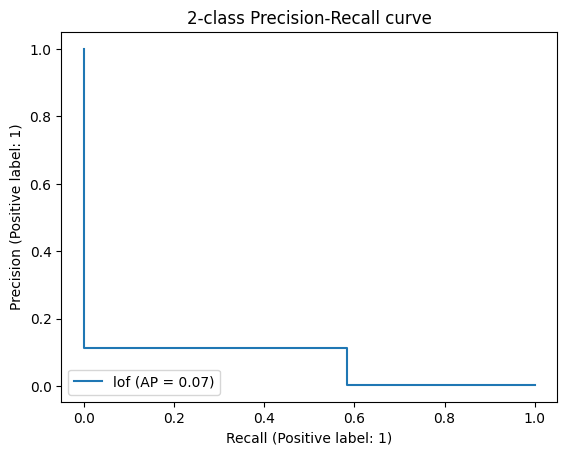

In [ ]:
y_thresh_200 = evaluate_thresh(y_score, 2, plot_roc=True)

dfn[f'Label_{model_name}_thresh_2.0'] = pd.Series(y_thresh_200)
dfn[dfn[f'Label_{model_name}_thresh_2.0'] == 1]['StreamID'].to_csv(f'result/{af}6.{pf}.{model_name}.{expname}.__{ra}__.detected.__p=2.0__.csv', index=False)

### p = 1%


------------
p = 1
score_threshold -5.268783007034772
[[755258   6322]
 [  1638   1324]]
              precision    recall  f1-score   support

           0     0.9978    0.9917    0.9948    761580
           1     0.1732    0.4470    0.2496      2962

    accuracy                         0.9896    764542
   macro avg     0.5855    0.7193    0.6222    764542
weighted avg     0.9946    0.9896    0.9919    764542

0.7193470550464944


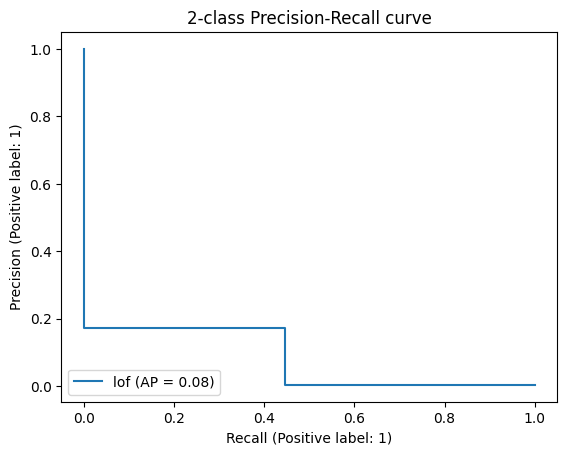

In [ ]:
y_thresh_100 = evaluate_thresh(y_score, 1, plot_roc=True)

dfn[f'Label_{model_name}_thresh_1.0'] = pd.Series(y_thresh_100)
dfn[dfn[f'Label_{model_name}_thresh_1.0'] == 1]['StreamID'].to_csv(f'result/{af}6.{pf}.{model_name}.{expname}.__{ra}__.detected.__p=1.0__.csv', index=False)

### p = 0.5%


------------
p = 0.5
score_threshold -15.572248501836375
[[758606   2974]
 [  2113    849]]
              precision    recall  f1-score   support

           0     0.9972    0.9961    0.9967    761580
           1     0.2221    0.2866    0.2503      2962

    accuracy                         0.9933    764542
   macro avg     0.6096    0.6414    0.6235    764542
weighted avg     0.9942    0.9933    0.9938    764542

0.6413628077198831


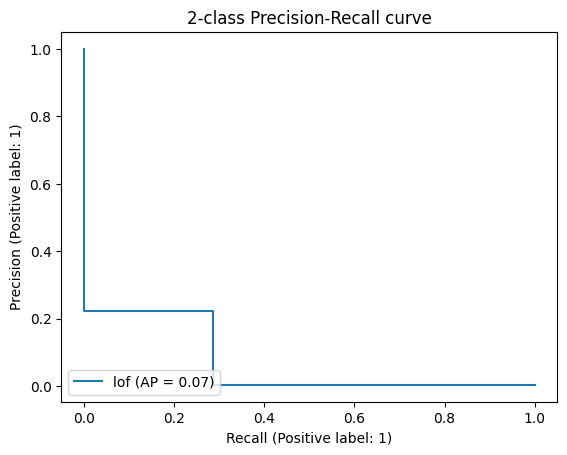

In [ ]:
y_thresh_050 = evaluate_thresh(y_score, .5, plot_roc=True)

dfn[f'Label_{model_name}_thresh_0.5'] = pd.Series(y_thresh_050)
dfn[dfn[f'Label_{model_name}_thresh_0.5'] == 1]['StreamID'].to_csv(f'result/{af}6.{pf}.{model_name}.{expname}.__{ra}__.detected.__p=0.5__.csv', index=False)

Reducing the threshold increases the precision (will recude the recall for class 1)

### p = 0.45%


------------
p = 0.45
score_threshold -20.02304846286557
[[758860   2720]
 [  2241    721]]
              precision    recall  f1-score   support

           0     0.9971    0.9964    0.9967    761580
           1     0.2095    0.2434    0.2252      2962

    accuracy                         0.9935    764542
   macro avg     0.6033    0.6199    0.6110    764542
weighted avg     0.9940    0.9935    0.9938    764542

0.6199225440184865


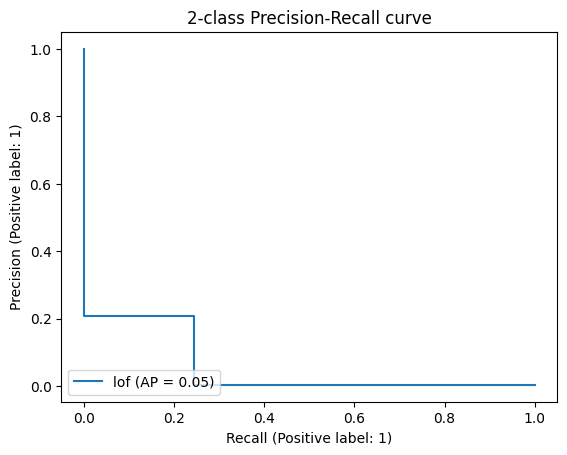

In [ ]:
y_thresh_045 = evaluate_thresh(y_score, .45, plot_roc=True)

dfn[f'Label_{model_name}_thresh_0.45'] = pd.Series(y_thresh_045)
dfn[dfn[f'Label_{model_name}_thresh_0.45'] == 1]['StreamID'].to_csv(f'result/{af}6.{pf}.{model_name}.{expname}.__{ra}__.detected.__p=0.45__.csv', index=False)

### p = 0.4%


------------
p = 0.4
score_threshold -25.115335898567096
[[759072   2508]
 [  2411    551]]
              precision    recall  f1-score   support

           0     0.9968    0.9967    0.9968    761580
           1     0.1801    0.1860    0.1830      2962

    accuracy                         0.9936    764542
   macro avg     0.5885    0.5914    0.5899    764542
weighted avg     0.9937    0.9936    0.9936    764542

0.5913649018772037


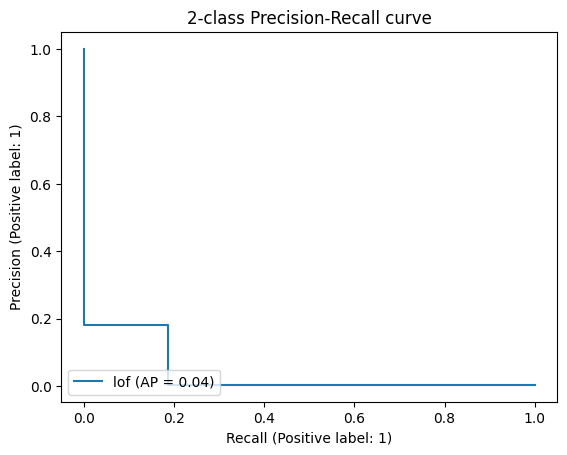

In [ ]:
y_thresh_040 = evaluate_thresh(y_score, .4, plot_roc=True)

dfn[f'Label_{model_name}_thresh_0.4'] = pd.Series(y_thresh_040)
dfn[dfn[f'Label_{model_name}_thresh_0.4'] == 1]['StreamID'].to_csv(f'result/{af}6.{pf}.{model_name}.{expname}.__{ra}__.detected.__p=0.4__.csv', index=False)

In [ ]:
dfn[['StreamID','StartTime','Label',f'Label_{model_name}',f'Label_{model_name}_thresh_1.0',f'Label_{model_name}_thresh_0.5',f'Label_{model_name}_thresh_0.45',f'Label_{model_name}_thresh_0.4']].to_csv(f'result/{af}6.{pf}.{model_name}.{expname}.__{ra}__.dfn.csv')

# Improv

It's a simple post-processing trick.  
By considering the ratio of number of flows detected as bots over the total flows from one SrcAddr, we can observe that if flows classified as bots by the model come from the same SrcAddr will be more likely to be bots (in contrast with only few flows come from an SrcAddr are detected as bots, which could be noise).  

**Note** that using this tactic will require analysing detected batch after a certain time period. It will decrease the capability to detect early anomalies.  

In [ ]:
pred_field = f'Label_{model_name}_thresh_1.0'

In [ ]:
detected = dfn.loc[(dfn[pred_field] == 1)]

In [ ]:
# print('total 0', len(dfn.loc[(dfn['Label'] == 0)]))
# print('total 1', len(dfn.loc[(dfn['Label'] == 1)]))
# print('total 2', len(dfn.loc[(dfn['Label'] == 2)]))
# print('total 3', len(dfn.loc[(dfn['Label'] == 3)]))
# print('total 4', len(dfn.loc[(dfn['Label'] == 4)]))
# detected['Label'].value_counts()

In [ ]:
detected_by_src = detected['SrcAddr'].value_counts()
detected_by_src

150.35.87.168      1324
150.35.87.121      1041
150.35.87.62        537
120.105.252.106     488
124.11.213.46       317
                   ... 
92.207.140.117        1
176.219.33.253        1
80.59.73.66           1
215.50.26.9           1
192.12.25.68          1
Name: SrcAddr, Length: 1538, dtype: int64

In [ ]:
detected['SrcAddr'].describe()

count              7646
unique             1538
top       150.35.87.168
freq               1324
Name: SrcAddr, dtype: object

In [ ]:
""" consider one SrcAddr, how many flows are detected as bot over total of flows """
counts_by_src = dfn['SrcAddr'].value_counts()
pd_counts_by_src = counts_by_src.to_frame().rename(columns={'SrcAddr': 'n_flows_total'})
pd_detected_by_src = detected_by_src.to_frame().rename(columns= {'SrcAddr': 'n_flows_detected'})

pd_by_src = pd.concat([pd_counts_by_src, pd_detected_by_src], axis=1).fillna(0)
pd_by_src['p'] = pd_by_src['n_flows_detected']/pd_by_src['n_flows_total']
pd_by_src = pd_by_src.sort_values(by=['p', 'n_flows_detected'], ascending=[False, False])

pd_by_src

,n_flows_total,n_flows_detected,p
44.143.74.210,19,19.0,1.0
13.11.3.101,10,10.0,1.0
199.204.138.175,6,6.0,1.0
195.171.91.94,5,5.0,1.0
67.15.76.164,4,4.0,1.0
...,...,...,...
197.75.169.85,1,0.0,0.0
176.22.230.180,1,0.0,0.0
88.230.136.131,1,0.0,0.0
82.55.192.57,1,0.0,0.0


In [ ]:
# pd_by_src.to_csv('pd_by_src.csv')

In [ ]:
idx_keep = detected_by_src[detected_by_src > 100].index
dfn[f'{pred_field}_improv'] = dfn[pred_field]
dfn.loc[(dfn[pred_field] == 1) & (~dfn['SrcAddr'].isin(idx_keep)), f'{pred_field}_improv'] = 0

In [ ]:
y_pred_improv = dfn[f'{pred_field}_improv'].values

In [ ]:
#? re-evaluate
evaluate(y_test, y_pred_improv)

[[758247   3333]
 [  1638   1324]]
              precision    recall  f1-score   support

           0     0.9978    0.9956    0.9967    761580
           1     0.2843    0.4470    0.3476      2962

    accuracy                         0.9935    764542
   macro avg     0.6411    0.7213    0.6721    764542
weighted avg     0.9951    0.9935    0.9942    764542

0.7213094227557306


## Improv Pipeline

In [ ]:
def improv(pred_field, p='None', num_thresh=100, per_thresh=0.5):
    """
    num_thresh: Only `SrcAddr` that has more than `num_thresh` detected as bot is classified as bot, otherwise consider them as normal.
    per_thresh: Only `SrcAddr` that has n_detected/n_total > per_thresh  detected as bot is classified as bot, otherwise consider them as normal.
    """
    detected = dfn.loc[(dfn[pred_field] == 1)]

    counts_by_src = dfn['SrcAddr'].value_counts()
    detected_by_src = detected['SrcAddr'].value_counts()
    # display(detected_by_src)

    pd_counts_by_src = counts_by_src.to_frame().rename(columns={'SrcAddr': 'n_flows_total'})
    pd_detected_by_src = detected_by_src.to_frame().rename(columns= {'SrcAddr': 'n_flows_detected'})
    
    pd_by_src = pd.concat([pd_counts_by_src, pd_detected_by_src], axis=1).fillna(0)
    pd_by_src['p'] = pd_by_src['n_flows_detected']/pd_by_src['n_flows_total']
    pd_by_src = pd_by_src.sort_values(by=['p', 'n_flows_detected'], ascending=[False, False])
    

    #? debug
    # # display(pd_counts_by_src)
    # # display(pd_detected_by_src)
    # display(pd_by_src)

    # concernAddr = pd_by_src[pd_by_src['p'] > per_thresh].index
    # display(pd_by_src[pd_by_src['p'] > per_thresh])
    # display(detected[detected['SrcAddr'].isin(concernAddr)])

    dfn[f'{pred_field}_improv'] = dfn[pred_field]
    if num_thresh == 0 and per_thresh > 0:
        idx_keep = pd_by_src[pd_by_src['p'] > per_thresh].index
        dfn.loc[(dfn[pred_field] == 1) & (~dfn['SrcAddr'].isin(idx_keep)), f'{pred_field}_improv'] = 0
    elif num_thresh > 0 and per_thresh == 0:
        idx_keep = pd_by_src[pd_by_src['n_flows_detected'] > num_thresh].index
        dfn.loc[(dfn[pred_field] == 1) & (~dfn['SrcAddr'].isin(idx_keep)), f'{pred_field}_improv'] = 0
    elif num_thresh > 0 and per_thresh > 0:
        idx_keep = pd_by_src[(pd_by_src['n_flows_detected'] > num_thresh) & (pd_by_src['p'] > per_thresh)].index
        dfn.loc[(dfn[pred_field] == 1) & (~dfn['SrcAddr'].isin(idx_keep)), f'{pred_field}_improv'] = 0
    
    y_pred_improv = dfn[f'{pred_field}_improv'].values


    #? re-evaluate
    evaluate(y_test, y_pred_improv, plot_roc=True)

    #? save
    dfn[dfn[f'{pred_field}_improv'] == 1]['StreamID'].to_csv(f'result/{af}6.{pf}.{model_name}.{expname}.__{ra}__.detected.__p={p}__.__improv_{num_thresh}_{per_thresh}__.csv', index=False)
    dfn[dfn[f'{pred_field}_improv'] == 1].to_csv(f'result/{af}6.{pf}.{model_name}.{expname}.__{ra}__.detected.__p={p}__.__improv_{num_thresh}_{per_thresh}__.full.csv', index=False)

[[759953   1627]
 [  1224   1738]]
              precision    recall  f1-score   support

           0     0.9984    0.9979    0.9981    761580
           1     0.5165    0.5868    0.5494      2962

    accuracy                         0.9963    764542
   macro avg     0.7574    0.7923    0.7738    764542
weighted avg     0.9965    0.9963    0.9964    764542

0.7923146753668707


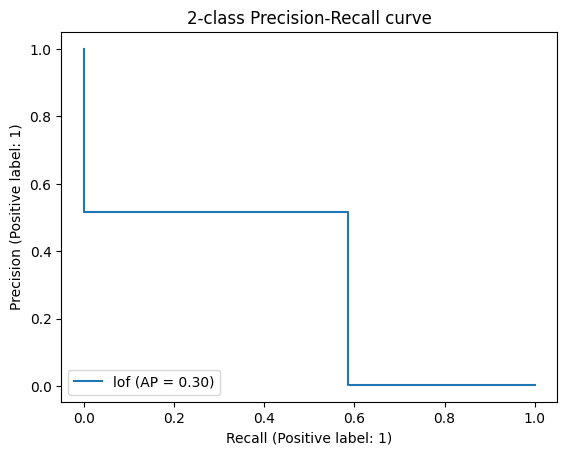

In [ ]:
improv(f'Label_{model_name}')

[[760089   1491]
 [  1232   1730]]
              precision    recall  f1-score   support

           0     0.9984    0.9980    0.9982    761580
           1     0.5371    0.5841    0.5596      2962

    accuracy                         0.9964    764542
   macro avg     0.7677    0.7911    0.7789    764542
weighted avg     0.9966    0.9964    0.9965    764542

0.7910535245332658


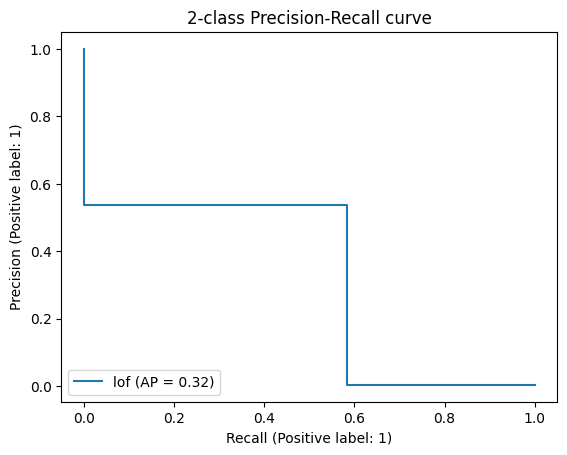

In [ ]:
improv(f'Label_{model_name}_thresh_2.0', '2.0')

[[760758    822]
 [  2962      0]]
              precision    recall  f1-score   support

           0     0.9961    0.9989    0.9975    761580
           1     0.0000    0.0000    0.0000      2962

    accuracy                         0.9951    764542
   macro avg     0.4981    0.4995    0.4988    764542
weighted avg     0.9923    0.9951    0.9937    764542

0.49946033246671395


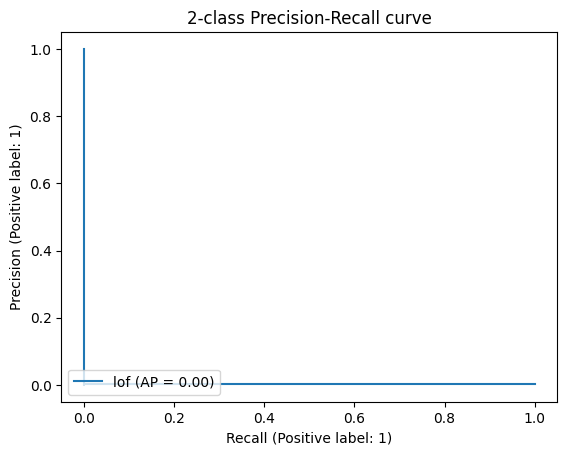

In [ ]:
improv(f'Label_{model_name}_thresh_1.0', '1.0')

[[760862    718]
 [  2962      0]]
              precision    recall  f1-score   support

           0     0.9961    0.9991    0.9976    761580
           1     0.0000    0.0000    0.0000      2962

    accuracy                         0.9952    764542
   macro avg     0.4981    0.4995    0.4988    764542
weighted avg     0.9923    0.9952    0.9937    764542

0.499528611570682


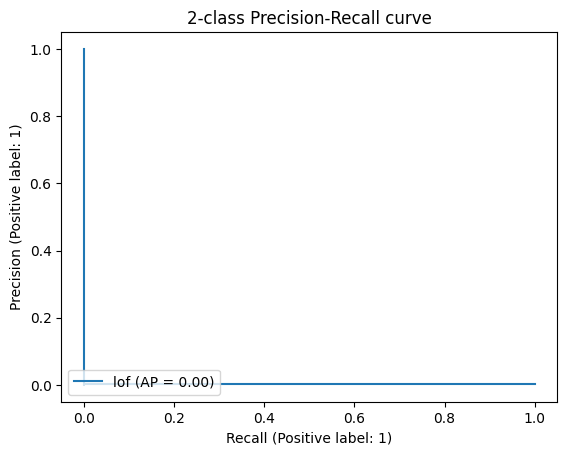

In [ ]:
improv(f'Label_{model_name}_thresh_0.5', '0.5')

[[760865    715]
 [  2962      0]]
              precision    recall  f1-score   support

           0     0.9961    0.9991    0.9976    761580
           1     0.0000    0.0000    0.0000      2962

    accuracy                         0.9952    764542
   macro avg     0.4981    0.4995    0.4988    764542
weighted avg     0.9923    0.9952    0.9937    764542

0.49953058116021953


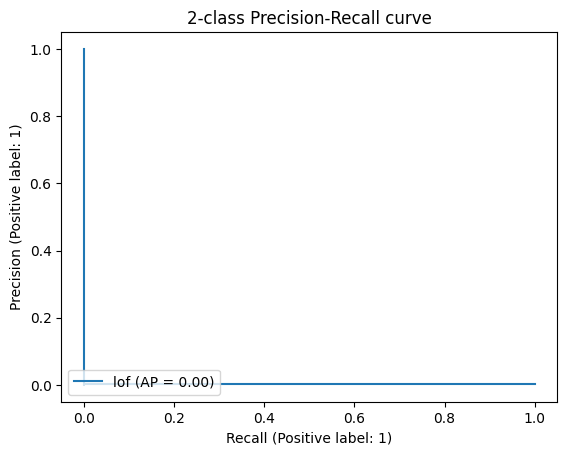

In [ ]:
improv(f'Label_{model_name}_thresh_0.45', '0.45')

[[760867    713]
 [  2962      0]]
              precision    recall  f1-score   support

           0     0.9961    0.9991    0.9976    761580
           1     0.0000    0.0000    0.0000      2962

    accuracy                         0.9952    764542
   macro avg     0.4981    0.4995    0.4988    764542
weighted avg     0.9923    0.9952    0.9937    764542

0.49953189421991123


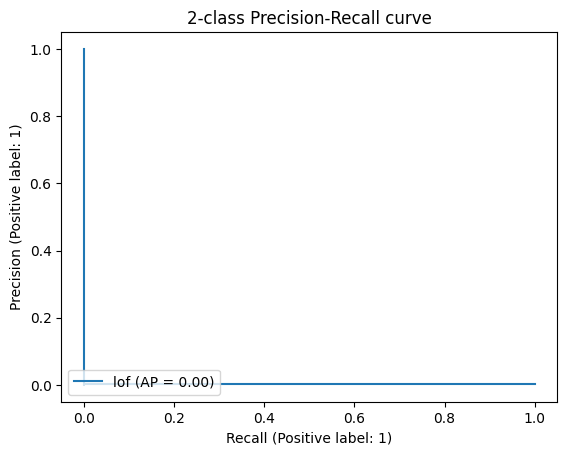

In [ ]:
improv(f'Label_{model_name}_thresh_0.4', '0.4')

In [ ]:
dfn[dfn['Label'] == 5][['StreamID','StartTime','Proto','State','Dport','LabelStr','Label',f'Label_{model_name}',f'Label_{model_name}_thresh_1.0',f'Label_{model_name}_thresh_0.5',f'Label_{model_name}_thresh_0.45',f'Label_{model_name}_thresh_0.4']].to_csv(f'result/{af}6.{pf}.{model_name}.{expname}.__{ra}__.true_bots.csv')

In [ ]:
dfn[dfn['Label'] != 5][(dfn[f'Label_{model_name}'] == 1) | (dfn[f'Label_{model_name}_thresh_1.0'] == 1) | (dfn[f'Label_{model_name}_thresh_0.5'] == 1) | (dfn[f'Label_{model_name}_thresh_0.4'] == 1)][['StreamID','StartTime','Proto','State','Dport','LabelStr','Label',f'Label_{model_name}',f'Label_{model_name}_thresh_1.0',f'Label_{model_name}_thresh_0.5',f'Label_{model_name}_thresh_0.45',f'Label_{model_name}_thresh_0.4']].to_csv(f'result/{af}6.{pf}.{model_name}.{expname}.__{ra}__.false_alarm.csv')

C:\Users\ZEPHYRUS\AppData\Local\Temp\ipykernel_1136\3697331295.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfn[dfn['Label'] != 5][(dfn[f'Label_{model_name}'] == 1) | (dfn[f'Label_{model_name}_thresh_1.0'] == 1) | (dfn[f'Label_{model_name}_thresh_0.5'] == 1) | (dfn[f'Label_{model_name}_thresh_0.4'] == 1)][['StreamID','StartTime','Proto','State','Dport','Label',f'Label_{model_name}',f'Label_{model_name}_thresh_1.0',f'Label_{model_name}_thresh_0.5',f'Label_{model_name}_thresh_0.45',f'Label_{model_name}_thresh_0.4']].to_csv('result/false_alarm.csv')
